# Week 4 challenge 
## Hypothesis Testing

**The following is the variable descriptions**

| variable         | description |
| ---------------- | ------------|
| `auction_id`     | The unique id of the online user who has been presented the BIO. |
| `experiment`     | The group the user belongs to - `exposed` or `control`. |
| `date`           | date in YYYY-MM-DD format. |
| `hour`           | hour of the day in HH format. |
| `device_make`    | name of the type of device the user has e.g. Samsung. |
| `platform_os`    | id of the OS the user has. |
| `browser`        | name of the browser the user uses to see the BIO questionnaire. |
| `yes`            | if the user chooses the `Yes` radio button for the BIO questionnaire. |
| `no`             | if the user chooses the `no` radio button for the BIO questionnaire. |

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import math as mt
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import binom
import scipy.stats as stats
from statsmodels.stats import weightstats

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

import xgboost as xgb

import warnings

warnings.filterwarnings('ignore')

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

C:\Users\briodev\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_csv("ABAdRecall.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
auction_id     8077 non-null object
experiment     8077 non-null object
date           8077 non-null object
hour           8077 non-null int64
device_make    8077 non-null object
platform_os    8077 non-null int64
browser        8077 non-null object
yes            8077 non-null int64
no             8077 non-null int64
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


# Unique values

In [4]:
df.nunique()

auction_id     8077
experiment        2
date              8
hour             24
device_make     270
platform_os       3
browser          15
yes               2
no                2
dtype: int64

# Basic Description

In [5]:
df.describe(include='all')

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
count,8077,8077,8077,8077.000000,8077,8077.000000,8077,8077.000000,8077.000000
unique,8077,2,8,NaN,270,NaN,15,NaN,NaN
top,7d4fe07e-94db-429b-9d8e-a335c3133d34,control,2020-07-03,NaN,Generic Smartphone,NaN,Chrome Mobile,NaN,NaN
freq,1,4071,2015,NaN,4743,NaN,4554,NaN,NaN
mean,NaN,NaN,NaN,11.615080,NaN,5.947134,NaN,0.070818,0.083075
std,NaN,NaN,NaN,5.734879,NaN,0.224333,NaN,0.256537,0.276013
min,NaN,NaN,NaN,0.000000,NaN,5.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,7.000000,NaN,6.000000,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,13.000000,NaN,6.000000,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,15.000000,NaN,6.000000,NaN,0.000000,0.000000


# Task 2.1

## Value counts for categorical features

In [7]:
# column : device_make
device_count = df['device_make'].value_counts()
print(device_count)

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
                      ... 
H3113                    1
XiaoMi MI 8              1
HTC One                  1
Wileyfox Swift           1
BBB100-2                 1
Name: device_make, Length: 270, dtype: int64


In [8]:
# column : experiment
experiment_count = df['experiment'].value_counts()
experiment_count

control    4071
exposed    4006
Name: experiment, dtype: int64

In [9]:
# column : browser
browser_count = df['browser'].value_counts()
browser_count

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Pinterest                        3
Opera Mobile                     3
Chrome                           3
Firefox Mobile                   1
Puffin                           1
Edge Mobile                      1
Opera Mini                       1
Android                          1
Name: browser, dtype: int64

In [10]:
# aggregate of yes and no per variant
variants_group = df.groupby(['experiment']).agg({'yes': [sum], 'no':[sum]})
variants_group.columns = ['yes', 'no']
variants_group

,yes,no
experiment,,
control,264,322
exposed,308,349


#### Observation

The exposed group is more aware of the smart ad brand compared to the control group.


# Distribution of device make

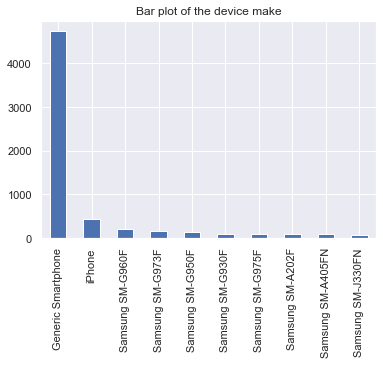

In [11]:
# Column : device_make
device_make_count = df["device_make"].value_counts()[:10]
device_make_count.plot(kind = "bar")
plt.title("Bar plot of the device make")
plt.show()

From the plot, the device make used by most users is Generic Smartphone

# Distribution of variants

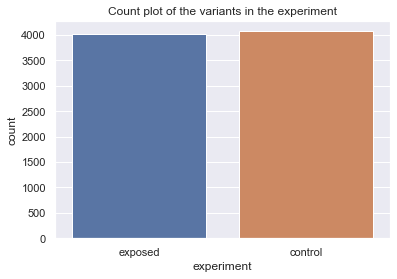

In [12]:
# Variable : Experiment
sns.countplot(x="experiment",data = df)
plt.title("Count plot of the variants in the experiment")

plt.show()

#### Observation

There are two variants, exposed group and control group, which almost have similar representation


# Distribution of user's browsers

Text(0.5, 1.0, 'Bar plot of 5 browsers')

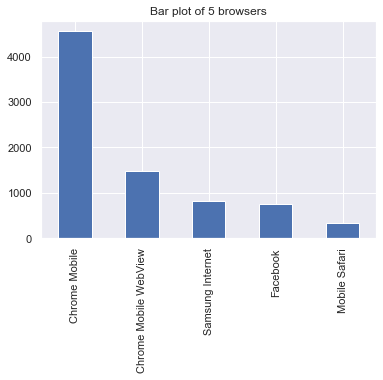

In [13]:
# Column : browser
browser_count = df["browser"].value_counts()[:5]
browser_count.plot(kind = "bar")
plt.title("Bar plot of 5 browsers")

#### Observation

Most users tend to use mobile version of chrome. This could be true since the most used device make is a mobile phone


## Splitting the dataset per the group in experiment

In [14]:
control_group = df[df["experiment"] == "control"]
control_group.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0


In [15]:
exposed_group = df[df["experiment"] == "exposed"]
exposed_group.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0


# Classical A/B Testing

### Null Hypothesis

There is no significant difference in the conversion rate between control group who are shown dummy ad and exposed group who are shown creative ad.

Conversion rate refers to people who agreed they are aware of the brand  

In [16]:
"""
finding the click rates for both control group and exposed group.
Click is the sum of yes for both variants.
"""

# finding the the size of both control group and exposed group
num_control_grp, num_exposed_grp = control_group['yes'].count(), exposed_group['yes'].count()
print("Size of control group and exposed group")
print("---------------------------------------")
print("Control group size: ", num_control_grp)
print("Exposed group size: ", num_exposed_grp)

# finding the number number of clicks for each group
click_ctrl_grp, click_exp_grp = control_group['yes'].sum(), exposed_group['yes'].sum()
print("\nNumber of clicks for control group and exposed group")
print("---------------------------------------")
print("Number of clicks control group: ", num_control_grp)
print("Number of clicks exposed group: ", num_exposed_grp)

"""
Finding conversion rate for both control group and exposed group
Conversion rate means the rate at which people were agreeing to know the brand awareness for either
of the groups
"""
rate_ctrl_grp, rate_exp_grp = click_ctrl_grp / num_control_grp, click_exp_grp / num_exposed_grp
print("\nConversion rates for control and exposed groups")
print("-----------------------------------------------")
print("Conversion rates in control group: {:.3f}".format(rate_ctrl_grp))
print("Conversion rates in exposed group: {:.3f}".format(rate_exp_grp))

Size of control group and exposed group
---------------------------------------
Control group size:  4071
Exposed group size:  4006

Number of clicks for control group and exposed group
---------------------------------------
Number of clicks control group:  4071
Number of clicks exposed group:  4006

Conversion rates for control and exposed groups
-----------------------------------------------
Conversion rates in control group: 0.065
Conversion rates in exposed group: 0.077


A user can click a yes button or no button. This is a binomial distribution, with unknown rate for either the site containing the dummy ad or the creative ad. Below, we are estimating the conversion rate using the sample.


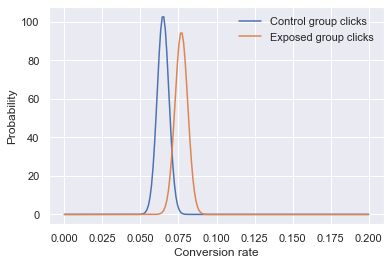

In [17]:
std_ctrl_grp = np.sqrt(rate_ctrl_grp * (1 - rate_ctrl_grp) / num_control_grp)
std_exp_grp = np.sqrt(rate_exp_grp * (1 - rate_exp_grp) / num_exposed_grp)

click_rate = np.linspace(0, 0.2, 200)
prob_ctrl_grp_clicks = norm(rate_ctrl_grp, std_ctrl_grp).pdf(click_rate)
prob_exp_grp_clicks = norm(rate_exp_grp, std_exp_grp).pdf(click_rate)

# Creating bar plots
plt.plot(click_rate, prob_ctrl_grp_clicks, label="Control group clicks")
plt.plot(click_rate, prob_exp_grp_clicks, label="Exposed group clicks")
plt.legend(frameon=False)
plt.xlabel("Conversion rate"); plt.ylabel("Probability");

plt.show()

The question still is: What is the chance that exposed group have higher conversion rate compared to control group? Is it significant?

Sum or difference of normally distributed random numbers is also a normal. This fact can be used to answer the question above. 
$P(exposed − control) = N(μB − μA, √σ2A + σ2B)$

zscore is 2.108, with p-value 0.018


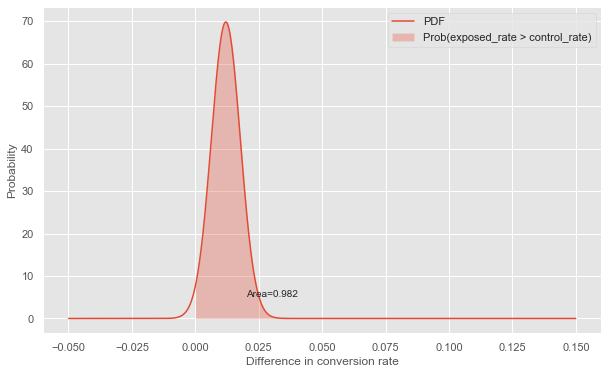

In [41]:
z_score = (rate_exp_grp - rate_ctrl_grp) / np.sqrt(std_ctrl_grp**2 + std_exp_grp**2)
p = norm(rate_exp_grp - rate_ctrl_grp, np.sqrt(std_ctrl_grp**2 + std_exp_grp**2))



x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.figure(figsize=(10,6))
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(exposed_rate > control_rate)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
#plt.savefig("classical.png")
plt.xlabel("Difference in conversion rate"); plt.ylabel("Probability")
           

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

### Observation

Using frequentist approach, we would say that the null hypothesis is true (that there is no significant difference in the conversion rate between control group who are shown dummy ad and exposed group who are shown creative ad. As this is a significant result, (typically p < 5%), we reject the null hypothesis, and state that there is a significant difference in the conversion rate between the dummy ad and creative ad. Users who are shown the creative ad are more aware of the brand than users who are shown the dummy ad.

<strong>Note</strong>: This is a one-tailed test - the question we've asked is if users exposed group are more aware of the brand than the users in control group.


# Getting confidence value

In [19]:
def get_confidence_value(click_a, num_a, click_b,  num_b):
    rate_a = click_a / num_a
    rate_b = click_b / num_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return norm.cdf(z_score)
    
confidence_value = get_confidence_value(click_ctrl_grp, num_control_grp, click_exp_grp, num_exposed_grp)
print("Confidence value", confidence_value)

Confidence value 0.9824645920271491


# Checking if we did the right thing

In [20]:
# Draw 10000 samples of possible rates for control group and exposed group
n = 10000

rates_control = norm(rate_ctrl_grp, std_ctrl_grp).rvs(n)
rates_exposed = norm(rate_exp_grp, std_exp_grp).rvs(n)
exposed_better = (rates_exposed > rates_control).sum() / n
print(f"Exposed is better than control {exposed_better * 100:0.1f}% of the time")

Exposed is better than control 98.1% of the time


# Sequential A/B Testing (Incomplete)

In [21]:
def ConditionalSPRT(self,x,y,t1,alpha=0.05,beta=0.10,stop=None):
        if t1<=1:
            printLog('warning',"Odd ratio should exceed 1.")
        if (alpha >0.5) | (beta >0.5):
            printLog('warning',"Unrealistic values of alpha or beta were passed."
                     +" You should have good reason to use large alpha & beta values")
        if stop!=None:
            stop=math.floor(n0)

        def comb(n, k):
            return factorial(n) // factorial(k) // factorial(n - k)
        
        def lchoose(b, j):
            a=[]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                if len(j)<2:
                    j=j[0]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                for k in j:
                    n=b
                    if (0 <= k) & (k<= n):
                        a.append(math.log(comb(n,k)))
                    else:
                        a.append(0)
            else:
                n=b
                k=j
                if (0 <= k) & (k<= n):
                    a.append(math.log(comb(n,k)))
                else:
                    a.append(0)

            return np.array(a)

        def g(x,r,n,t1,t0=1):
            return -math.log(h(x,r,n,t1))+math.log(h(x,r,n,t0))

        def h(x,r,n,t=1):
            return f(r,n,t,offset=ftermlog(x,r,n,t))

        def f(r,n,t,offset=0):
            upper=max(0,r-n)
            lower=min(n,r)
            rng=list(range(upper,lower+1))
            return np.sum(fterm(rng,r,n,t,offset))

        def fterm(j,r,n,t,offset=0):
            ftlog=ftermlog(j,r,n,t,offset)
            return np.array([math.exp(ex) for ex in ftlog])

        def ftermlog(j,r,n,t,offset=0):
            xx=r-j
            lch=lchoose(n,j)
            lchdiff=lchoose(n,xx)
            lg=np.array(j)*math.log(t)
            lgsum=lch+lchdiff
            lgsum2=lgsum+lg
            lgdiff=lgsum2-offset

            return lgdiff

        def logf(r,n,t,offset=0):

            z=f(r,n,t,offset)
            if z>0:
                return math.log(z)
            else:
                return np.nan

        def clowerUpper(r,n,t1c,t0=1,alpha=0.05,beta=0.10):
            offset=ftermlog(math.ceil(r/2),r,n,t1c)
            z=logf(r,n,t1c,logf(r,n,t0,offset)+offset)
            a=-math.log(alpha/(1-beta))
            b=math.log(beta/(1-alpha))
            lower=b
            upper=1+a
            return (np.array([lower,upper])+z)/math.log(t1c/t0)
            
        l=math.log(beta/(1-alpha))
        u=-math.log(alpha/(1-beta))
        sample_size=min(len(x),len(y))
        n=np.array(range(1,sample_size+1))

        if stop!=None:
            n=np.array([z for z in n if z<=stop])
        x1=np.cumsum(x[n-1])
        r=x1+np.cumsum(y[n-1])
        stats=np.array(list(map(g,x1, r, n, [t1]*len(x1)))) #recurcively calls g

        clu=list(map(clowerUpper,r,n,[t1]*len(r),[1]*len(r),[alpha]*len(r), [beta]*len(r)))
        limits=[]
        for v in clu:
            inArray=[]
            for vin in v:
                inArray.append(math.floor(vin))
            limits.append(np.array(inArray))
        limits=np.array(limits)

        k=np.where((stats>=u) | (stats<=l))
        cvalues=stats[k]
        if cvalues.shape[0]<1:
            k= np.nan
            outcome='Unable to conclude.Needs more sample.'
        else:
            k=np.min(k)
            if stats[k]>=u:
                outcome=f'Exposed group produced a statistically significant increase.'
            else:
                outcome='Their is no statistically significant difference between two test groups'
        if (stop!=None) & (k==np.nan):
            c1=clowerUpper(r,stop,t1,alpha,beta)
            c1=math.floor(np.mean(c1)-0.5)
            if x1[n0]<=c1:
                truncate_decision='h0'
                outcome='Maximum Limit Decision. The aproximate decision point shows their is no statistically significant difference between two test groups'
            else:
                truncate_decision='h1'
                outcome=f'Maximum Limit Decision. The aproximate decision point shows exposed group produced a statistically significant increase.'
            truncated=stop
        else:
            truncate_decision='Non'
            truncated=np.nan
        return (outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)